# VÍ DỤ 2

Thực hiện gọi các thư viện cần thiết:

In [11]:
#!pip install tensorflow_datasets
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras

In [2]:
pip install tensorflow_datasets

  Using cached promise-2.3-py3-none-any.whl
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/5.1 MB 3.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.6/5.1 MB 6.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.2/5.1 MB 8.7 MB/s eta 0:00:01
   -------------- ------------------------- 1.9/5.1 MB 10.1 MB/s eta 0:00:01
   --------------------- ------------------ 2.7/5.1 MB 11.3 MB/s eta 0:00:01
   ------------------------- -------------- 3.3/5.1 MB 11.6 MB/s eta 0:00:01
   -------------------------------- ------- 4.1/5.1 MB 12.4 MB/s eta 0:00:01
   -------------------------------------- - 4.8/5.1 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 5.1/5.1 MB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/156.1 kB ? eta -:--:--
   ---------------------------------------- 156.1/156.1 kB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-recommenders 0.7.3 requires tensorflow>=2.9.0; sys_platform != "darwin", which is not installed.


In [12]:
import tensorflow_datasets as tfds

Đoạn code tiếp theo thực hiện việc khởi dựng mô hình CNN với kiến trúc gồm:
- 3 tầng Convolution & MaxPooling nối tiếp: Tầng đầu gồm 16 filters; Tầng 2 gồm 32 filters và tầng ba gồm 64
filters, tất cả có cùng cỡ 3x3;
- Tiếp theo tầng Convolution thứ ba là tầng Flatten;
- Tiếp theo đó ta có tầng FullyConnected (FullConnection) FC với đầu ra là vector đặc trưng 512 phần tử. Tất cả
các tầng Conv và FC đều sử dụng activation là ReLU;
- Cuối cùng, ta có tầng đầu ra với activation là SoftMax chia 03 loại.

In [13]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,
    3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    from tensorflow.keras.optimizers import RMSprop
    
    model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc'])
    return model

Tiếp theo chúng ta thiết lập dữ liệu và gọi mô hình để huấn luyện và dự báo

In [14]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory('/CNN_MultiClass_data/animals',
    # Source directory
    target_size=(150, 150), # Resizes images
    batch_size=15,
    class_mode='categorical',subset = 'training')
    epochs = 2
    #Testing data
    validation_generator = train_datagen.flow_from_directory('/CNN_MultiClass_data/validation',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation') # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(
    train_generator,
    steps_per_epoch=150,
    epochs=epochs,
    validation_data = validation_generator,

    validation_steps = 50,
    verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
    model.save_weights('saved_weights.h5')
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Cuối cùng chúng ta gọi thực hiện mô hình:

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2


C:\Users\FPT\AppData\Local\Temp\ipykernel_24228\1952709608.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


150/150 [==============================] - 28s 177ms/step - loss: 0.9820 - acc: 0.5440 - val_loss: 0.7863 - val_acc: 0.5800
Epoch 2/2
150/150 [==============================] - 25s 169ms/step - loss: 0.7018 - acc: 0.6511 - val_loss: 0.7454 - val_acc: 0.6133


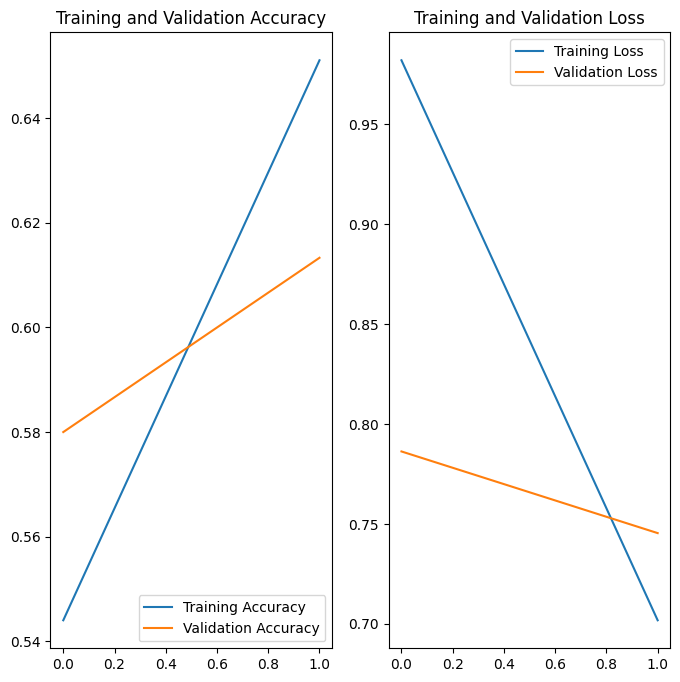

Training Accuracy:
0.6511111259460449
Testing Accuracy:
0.6133333444595337


In [15]:
train_test_animals()

# Bài tập tự thực hành

# A )

Đánh giá độ chính xác trên bộ sưu tập hình ảnh

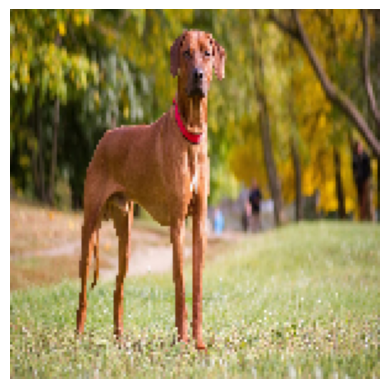

1/1 [==============================] - 0s 111ms/step
Image: D:/1.jpg, Predicted class: cat


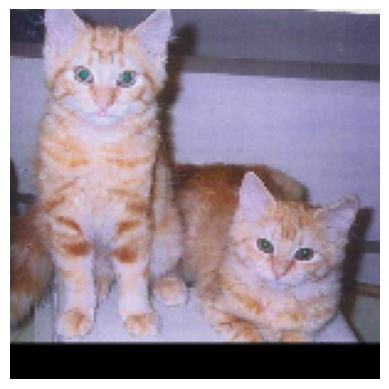

1/1 [==============================] - 0s 26ms/step
Image: D:/2.jpg, Predicted class: cat


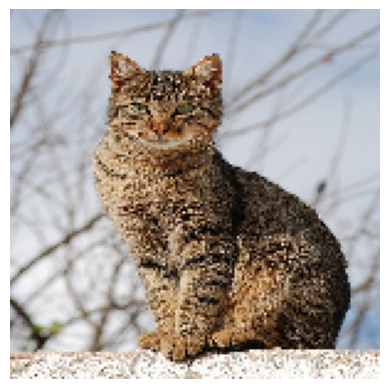

1/1 [==============================] - 0s 40ms/step
Image: D:/3.jpg, Predicted class: cat


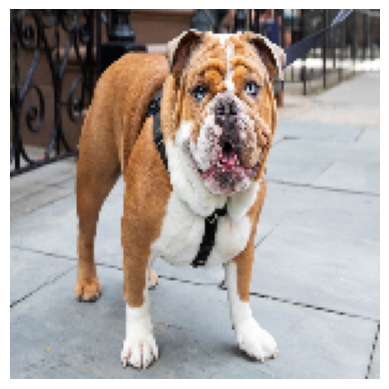

1/1 [==============================] - 0s 28ms/step
Image: D:/4.jpg, Predicted class: dog


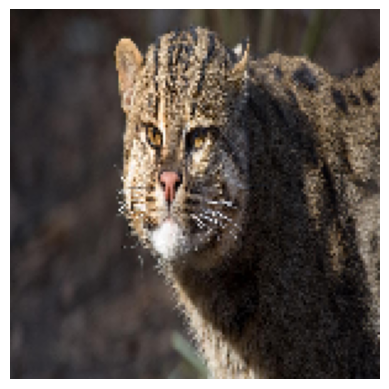

1/1 [==============================] - 0s 34ms/step
Image: D:/5.jpg, Predicted class: cat


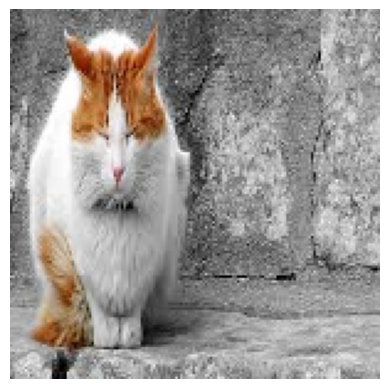

1/1 [==============================] - 0s 28ms/step
Image: D:/6.jpg, Predicted class: cat


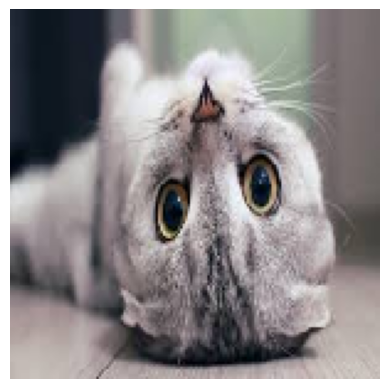

1/1 [==============================] - 0s 29ms/step
Image: D:/7.jpg, Predicted class: cat


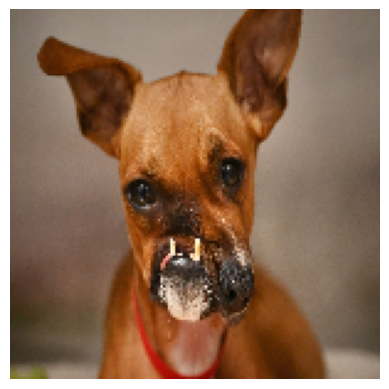

1/1 [==============================] - 0s 26ms/step
Image: D:/8.jpg, Predicted class: dog


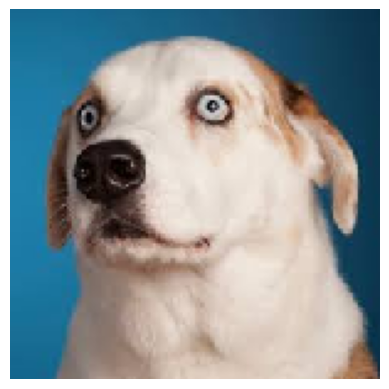

1/1 [==============================] - 0s 44ms/step
Image: D:/9.jpg, Predicted class: cat


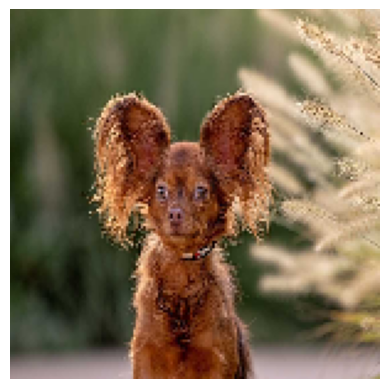

1/1 [==============================] - 0s 26ms/step
Image: D:/10.jpg, Predicted class: dog


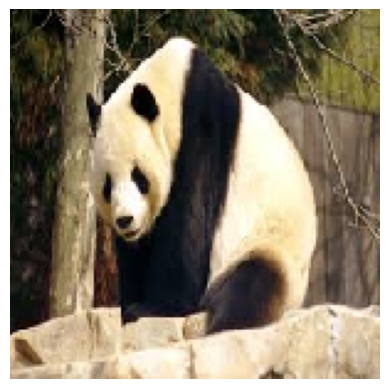

1/1 [==============================] - 0s 25ms/step
Image: D:/11.jpg, Predicted class: panda


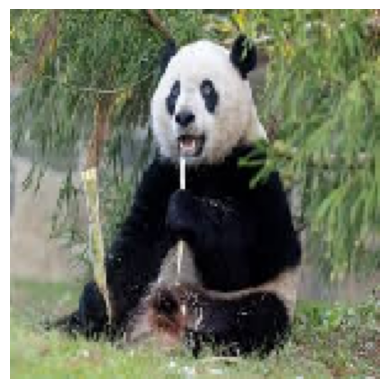

1/1 [==============================] - 0s 42ms/step
Image: D:/12.jpg, Predicted class: panda


In [16]:
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

def load_and_preprocess_image(image_path):
    # Load image and preprocess it
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize image to match input shape of the model
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img = img.reshape(1, 150, 150, 3)  # Reshape to match model input shape
    return img

def classify_images(image_paths, model):
    classes = {0: 'cat', 1: 'dog', 2: 'panda'}  # Mapping from class index to class name

    for image_path in image_paths:
        # Load and preprocess image
        img = load_and_preprocess_image(image_path)
        
        imgage = load_img(image_path, target_size=(150, 150))
        
        plt.imshow(imgage)  # Display the image
        plt.axis('off')  # Turn off axis
        plt.show()  # Show the image
        
        # Predict class probabilities
        predictions = model.predict(img)
        
        # Get predicted class index
        predicted_class_index = np.argmax(predictions)
        
        # Get predicted class name
        predicted_class_name = classes[predicted_class_index]
        
        # Print result
        print(f"Image: {image_path}, Predicted class: {predicted_class_name}")

# Load pre-trained model
model = gen_model()
model.load_weights('saved_weights.h5')  # Load saved weights

# List of image paths to classify
image_paths = ['D:/1.jpg', 'D:/2.jpg', 'D:/3.jpg', 'D:/4.jpg', 'D:/5.jpg', 'D:/6.jpg', 'D:/7.jpg', 'D:/8.jpg', 'D:/9.jpg', 'D:/10.jpg', 'D:/11.jpg', 'D:/12.jpg']

# Classify images
classify_images(image_paths, model)


## B )

### Thực hiện chuyển ảnh thành vector, sau đó sử dụng mô hình Hồi quy SOFTMAX để phân loại ảnh. Đánh giá độ chính xác bằng các độ đo.

Đưa kích thước các ảnh (resize) về 150x150



In [17]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_dir = '/CNN_MultiClass_data/animals'
validation_dir = '/CNN_MultiClass_data/validation'

# Function to resize images
def resize_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path)
    image = image.resize(target_size).convert("RGB")
    return np.array(image)

def load_data(train_dir):
    images = []
    labels = []
    for label in os.listdir(train_dir):
        
        label_dir = os.path.join(train_dir, label)
        for file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, file)
            # Resize image to 150x150
            try:
                resized_image = resize_image(image_path)
                images.append(resized_image)
                # Assign label based on folder name
                if label == 'cats':
                    labels.append(1)  # One-hot encoding for 'cat' (0, 1)
                elif label == 'dogs':
                    labels.append(0)# One-hot encoding for 'dog' (1, 0)
                elif label == 'panda':
                    labels.append(2)
            except Exception as e:
                print("Error processing image:", image_path)
                print("Error message:", str(e))
    return np.array(images), np.array(labels)


# Load and prepare data
images, labels = load_data(train_dir)

# X_train, y_train = load_data(train_dir)
# X_test, y_test = load_data(validation_dir)

# images = np.array(images)
# labels = np.array(labels)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Train a Softmax Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_flatten, y_train)

# Evaluate the model
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5416666666666666
Precision: 0.5552675397216466
Recall: 0.543589063811759
F1 Score: 0.5482168482763501


### ANN để phân loại

Dùng PCA giảm số chiều về còn 225

In [18]:
from sklearn.decomposition import PCA

# Flatten images
X_flatten_train = X_train.reshape(X_train.shape[0], -1)
X_flatten_test = X_test.reshape(X_test.shape[0], -1)

# Initialize PCA with n_components=225
pca = PCA(n_components=225)

# Fit PCA to flattened images
pca.fit(X_flatten_train)
pca.fit(X_flatten_test)

# Transform flattened images to reduced dimension
X_reduced_train = pca.transform(X_flatten_train)
X_reduced_test = pca.transform(X_flatten_test)

# X_reduced sẽ có hình dạng (2000, 225), giảm chiều của mỗi ảnh từ (150, 150, 3) xuống còn 225 thành phần

In [19]:
print(X_reduced_train.shape)

(2400, 225)


Sử dụng mô hình ANN đã có để phân loại.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

# Step 3: Huấn luyện mô hình ANN
# Đây là một ví dụ, bạn có thể thay thế bằng mô hình ANN đã có
# ở đây, sử dụng một pipeline để kết hợp PCA và mô hình ANN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Chuẩn hóa dữ liệu
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,)))  # Mô hình ANN
])

pipeline.fit(X_reduced_train, y_train)

# Step 4: Đánh giá hiệu suất của mô hình ANN
accuracy = pipeline.score(X_reduced_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.565


### Phân loại bằng Softmax

Đưa về phân loại 02 lớp (chỉ cho chó – mèo) nhưng giữ nguyên hàm kíchhoạt tầng đầu ra là SOFTMAX
- Chỉ lấy 300 ảnh làm dữ liệu training và 100 ảnh làm dữ liệu validation
- Chạy dự đoán kết quả

In [22]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_dir = '/CNN_MultiClass_data/animals'
validation_dir = '/CNN_MultiClass_data/validation'

# Function to resize images
def resize_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path)
    image = image.resize(target_size).convert("RGB")
    return np.array(image)

def load_data(train_dir):
    images = []
    labels = []
    for label in os.listdir(train_dir):
        if label == 'panda':
            continue
        label_dir = os.path.join(train_dir, label)
        for file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, file)
            # Resize image to 150x150
            try:
                resized_image = resize_image(image_path)
                images.append(resized_image)
                # Assign label based on folder name
                if label == 'cats':
                    labels.append(1)  # One-hot encoding for 'cat' (0, 1)
                elif label == 'dogs':
                    labels.append(0)# One-hot encoding for 'dog' (1, 0)
            except Exception as e:
                print("Error processing image:", image_path)
                print("Error message:", str(e))
    return np.array(images), np.array(labels)


# Load and prepare data
images, labels = load_data(train_dir)

#Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, train_size=300, test_size=100, random_state=42)

# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Train a Softmax Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_flatten, y_train)

# Evaluate the model
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.4583333333333333
Precision: 0.3051305130513051
Recall: 0.44067307617332174
F1 Score: 0.3604588394062078


c:\Users\FPT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Bổ sung các tầng Dropout này vào giữa các tầng Convolution, rate_drop khoảng từ 0.3 đến 0.5 và quan
sát kết quả sau khi thay đổi.

## C )

In [23]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
import random


def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,
    3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    from tensorflow.keras.optimizers import RMSprop
    
    model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc'])
    return model

In [24]:
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory('/CNN_MultiClass_data/animals',
    # Source directory
    target_size=(150, 150), # Resizes images
    batch_size=15,
    class_mode='categorical',subset = 'training')
    epochs = 2
    #Testing data
    validation_generator = train_datagen.flow_from_directory('/CNN_MultiClass_data/validation',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation') # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(
    train_generator,
    steps_per_epoch=150,
    epochs=epochs,
    validation_data = validation_generator,

    validation_steps = 50,
    verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
    model.save_weights('saved_weights.h5')
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


C:\Users\FPT\AppData\Local\Temp\ipykernel_24228\18366991.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
150/150 [==============================] - 28s 178ms/step - loss: 0.9132 - acc: 0.5409 - val_loss: 0.8331 - val_acc: 0.6040
Epoch 2/2
150/150 [==============================] - 26s 171ms/step - loss: 0.7310 - acc: 0.6209 - val_loss: 0.7929 - val_acc: 0.6320


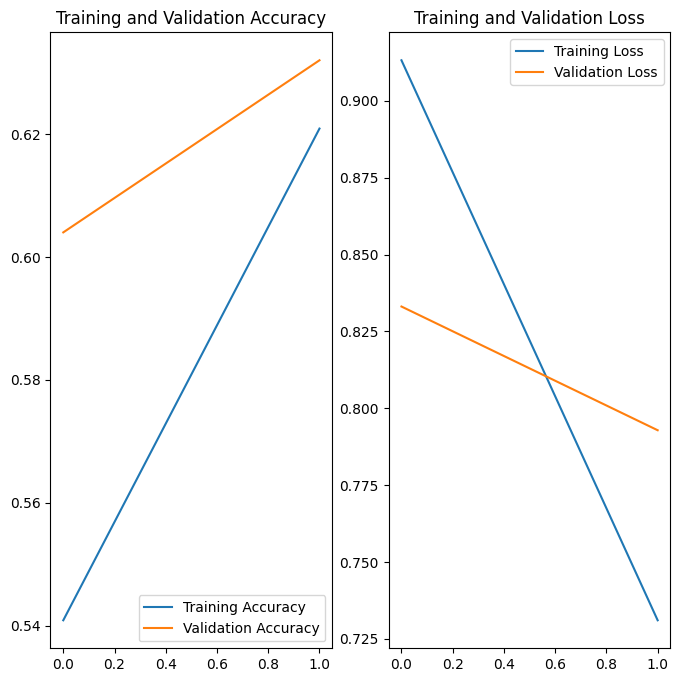

Training Accuracy:
0.620888888835907
Testing Accuracy:
0.6320000290870667


In [25]:
train_test_animals()